# Exploratory Data Analysis - Retail

## Objective

Analyse and Explore the dataset and find out the hot point and do prediction

## Dataset

Click here to download the dataset : https://bit.ly/3i4rbWl

## Import Libraries

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor)
from sklearn.model_selection import KFold, cross_val_score
from scipy.stats import pearsonr

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import explained_variance_score

### Read the dataset

In [2]:
df = pd.read_csv("SampleSuperstore.csv")

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
#Renaming the feature columns for better representation
columns = [column.replace(' ', '_') for column in df.columns]
columns = [column.replace('-', '_') for column in columns]
df = df.set_axis(columns, axis='columns')

In [5]:
print("Total Number of rows in the dataset",df.shape[0])
print("Total Number of columns in the dataset",df.shape[1])
print()
df.head()


Total Number of rows in the dataset 9994
Total Number of columns in the dataset 13



,Ship_Mode,Segment,Country,City,State,Postal_Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
df.describe()

,Postal_Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship_Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal_Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub_Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
df.isna().sum()

Ship_Mode       0
Segment         0
Country         0
City            0
State           0
Postal_Code     0
Region          0
Category        0
Sub_Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
#plot Postal_Code

In [10]:
df.drop('Postal_Code',axis=1,inplace=True)

,Sales,Quantity,Discount,Profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164


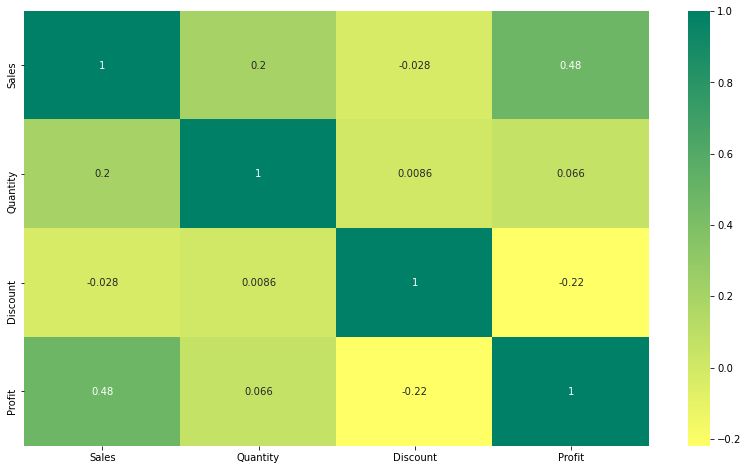

In [11]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(),annot=True,cmap="summer_r")
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

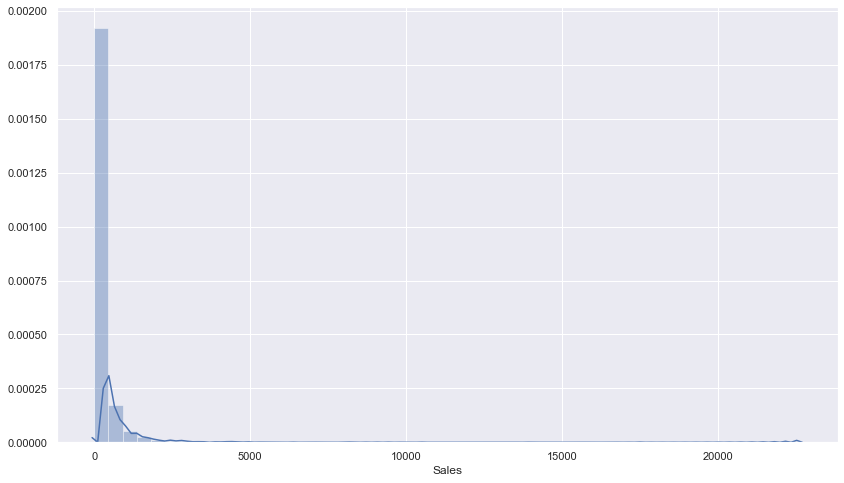

In [12]:
sns.set(style="darkgrid")
plt.figure(figsize=(14,8))
sns.distplot(df["Sales"],kde=True)

## Detecting the outlier with Boxplot

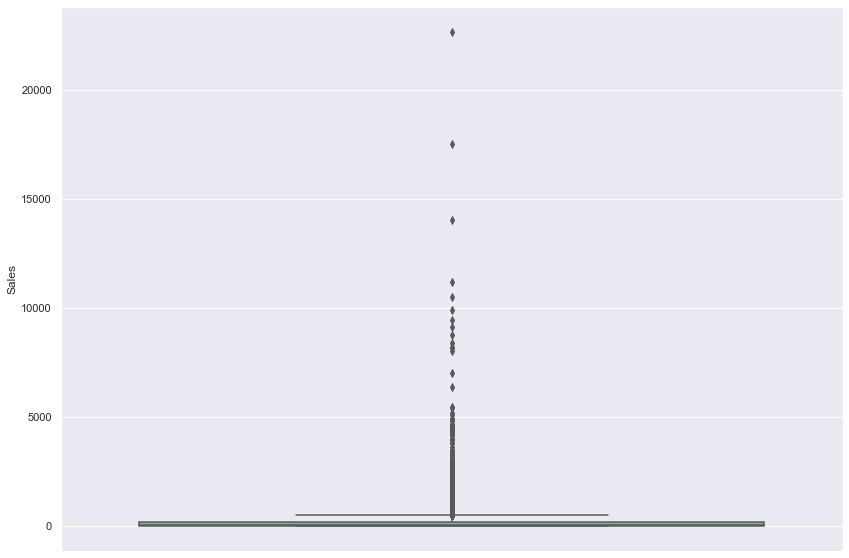

In [13]:
sns.set(style="darkgrid")
plt.figure(figsize=(14,10))
sns.boxplot(x=df["Sales"],orient="v", palette="Set2")
plt.show()

### Removing the OutLier with Inter Quartile Range Method

In [14]:
def detecting_and_removing_Outliers(data):
    Q1 = np.quantile(data,0.25)
    Q3 = np.quantile(data,0.75)
    IQR = Q3 - Q1
    cut_off = IQR * 1.5
    lower, upper = Q1 - cut_off, Q3 + cut_off
    outliers = [i for i in range(len(data)) if data[i] < lower or data[i] > upper]
    print("Index of Outlier Row index:",len(outliers))
    df.drop(outliers,axis=0,inplace=True)
    df.reset_index(drop=True,inplace=True)


In [15]:
detecting_and_removing_Outliers(df["Sales"])

Index of Outlier Row index: 1167


In [16]:
print(df.shape)
df.head()

(8827, 12)


,Ship_Mode,Segment,Country,City,State,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.960,2,0.0,41.9136
1,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.620,2,0.0,6.8714
2,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.368,2,0.2,2.5164
3,Standard Class,Consumer,United States,Los Angeles,California,West,Furniture,Furnishings,48.860,7,0.0,14.1694
4,Standard Class,Consumer,United States,Los Angeles,California,West,Office Supplies,Art,7.280,4,0.0,1.9656


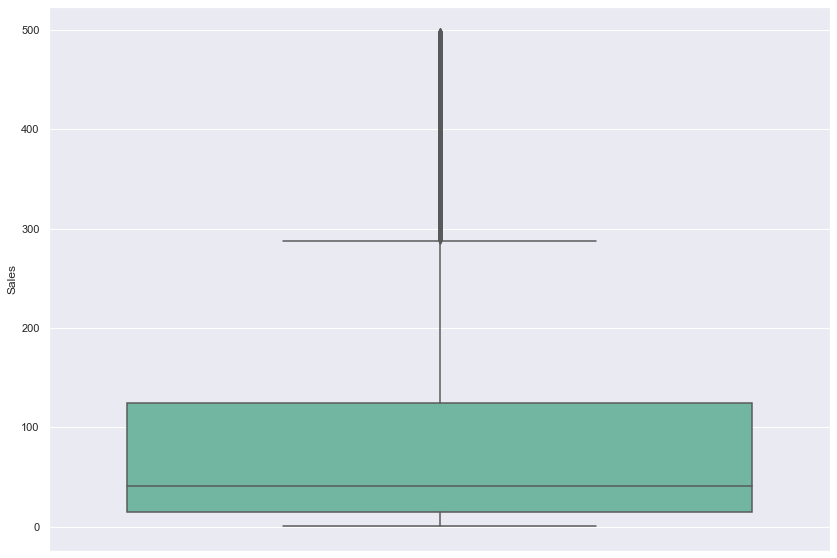

In [17]:
sns.set(style="darkgrid")
plt.figure(figsize=(14,10))
sns.boxplot(x=df["Sales"],orient="v", palette="Set2")
plt.show()

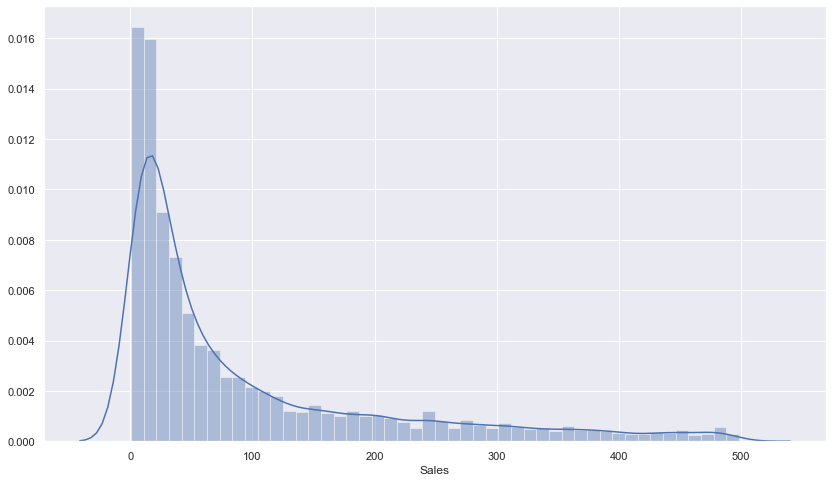

In [18]:
sns.set(style="darkgrid")
plt.figure(figsize=(14,8))
sns.distplot(df["Sales"],kde=True)

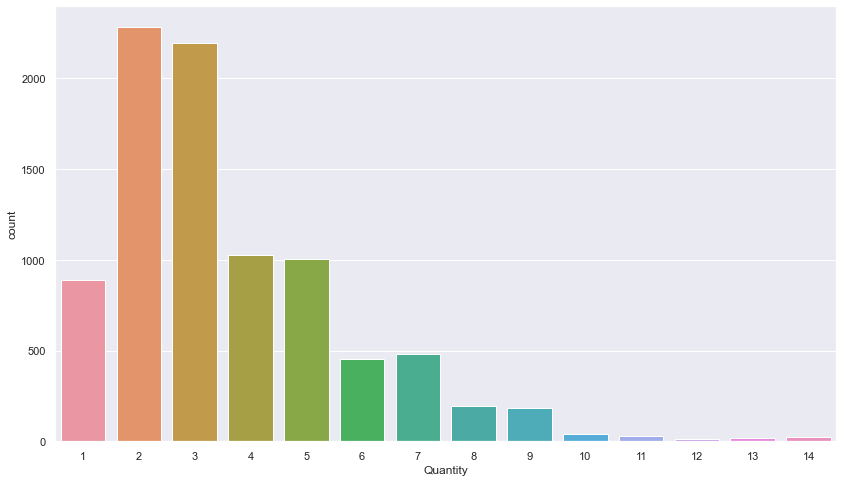

In [19]:
sns.set(style="darkgrid")
plt.figure(figsize=(14,8))
sns.countplot('Quantity',data=df)

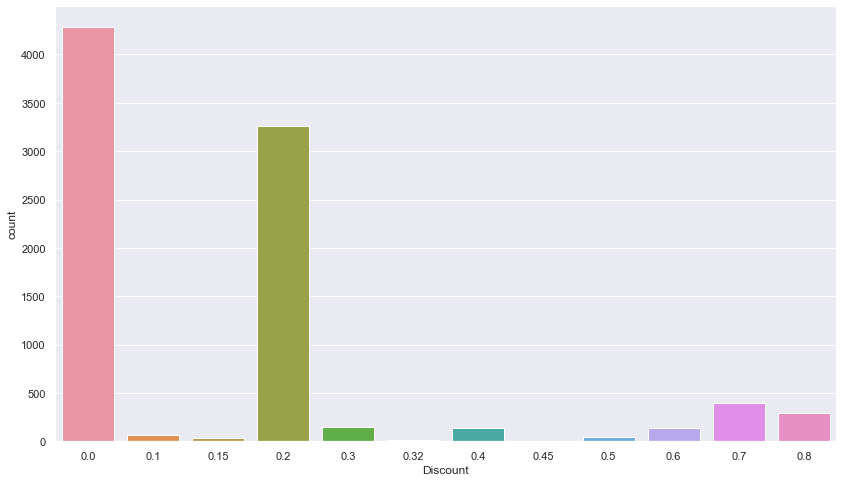

In [20]:
sns.set(style="darkgrid")
plt.figure(figsize=(14,8))
sns.countplot('Discount',data=df)

In [21]:
df.describe(include=['object'])

,Ship_Mode,Segment,Country,City,State,Region,Category,Sub_Category
count,8827,8827,8827,8827,8827,8827,8827,8827
unique,4,3,1,527,48,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5283,4626,8827,789,1763,2829,5726,1443


In [22]:
#as you can see we have only one categorical value in Country Column
#So, we should drop it because this will not making any effect on Profit
df.drop('Country',axis=1,inplace=True)

In [23]:
def CountPlot(column_name):
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(14,6))
    sns.countplot(data=df, x=column_name,palette="Set2")
    plt.show()

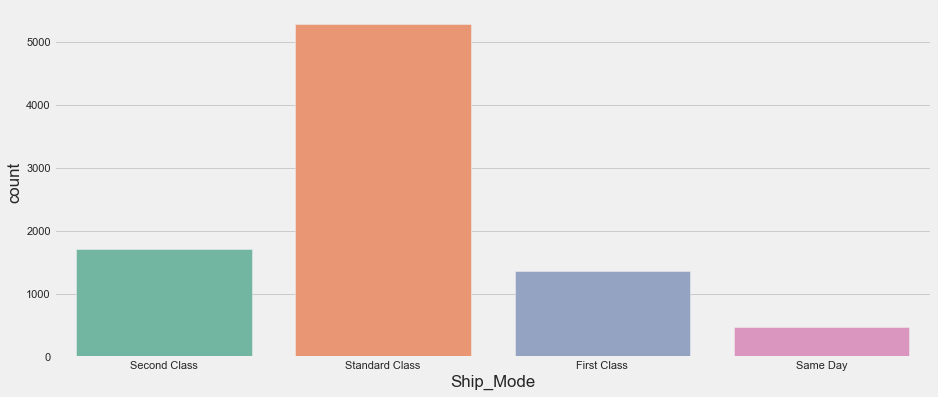

In [24]:
CountPlot("Ship_Mode")

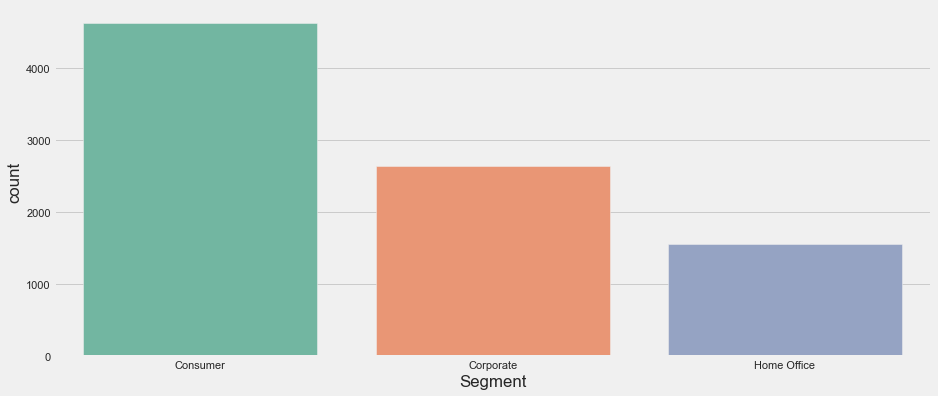

In [25]:
CountPlot("Segment")

### Label Encoder for categorical feature

In [26]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
for column in list(df.select_dtypes(include=['object', 'category']).columns):
    df.loc[:,column] = lb_make.fit_transform(df.loc[:,column])
df.head()

,Ship_Mode,Segment,City,State,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
0,2,0,193,15,2,0,4,261.960,2,0.0,41.9136
1,2,1,263,3,3,1,10,14.620,2,0.0,6.8714
2,3,0,152,8,2,1,14,22.368,2,0.2,2.5164
3,3,0,263,3,3,0,9,48.860,7,0.0,14.1694
4,3,0,263,3,3,1,2,7.280,4,0.0,1.9656


### Checking Pearson Correlation with Feature Columns

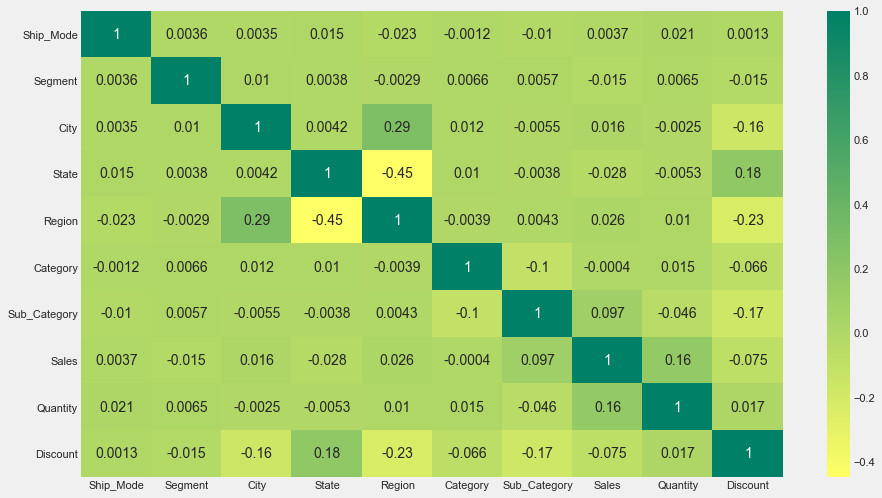

In [28]:
plt.figure(figsize=(14,8))
sns.heatmap(df.drop("Profit", axis=1).corr(),annot=True,cmap="summer_r")

## Split the dataset into Feature and Target Column

In [29]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X.shape,y.shape

((8827, 10), (8827,))

### Split the dataset into Train Test dataset

In [30]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.25,random_state=0)
Xtrain.head()

,Ship_Mode,Segment,City,State,Region,Category,Sub_Category,Sales,Quantity,Discount
4008,3,0,206,41,0,1,3,10.476,6,0.8
5586,3,1,448,45,3,1,12,25.920,4,0.0
7141,3,0,79,11,0,1,7,55.584,6,0.2
6672,0,0,371,36,1,1,14,422.856,3,0.2
3170,3,2,371,36,1,2,0,36.784,2,0.2


### Scaling the dataset

In [31]:
StdScale = StandardScaler().fit(Xtrain)
Xtrain = StdScale.transform(Xtrain)

In [32]:
Xtest = StdScale.transform(Xtest)

## Polynomial Regression on dataset

In [34]:
X = StdScale.transform(X)
degrees = [2, 3, 4, 5, 6] # Change degree "hyperparameter" here
normalizes = [True, False] # Change normalize hyperparameter here
best_score = 0
best_degree = 0
for degree in degrees:
    reg_model = make_pipeline(PolynomialFeatures(degree = degree),Ridge(0.5))
    scores = cross_val_score(reg_model, X, y, cv=5) # Change k-fold cv value here
    if max(scores) > best_score:
        best_model = reg_model
        best_score = max(scores)
        best_degree = degree

#### Output of Polynomial regression and showing the best degree, which giving best result

In [35]:
print("Best Accuracy Score {0}, on Polynomial Degree {1}".format(best_score,best_degree))

Best Accuracy Score 0.8869360750891417, on Polynomial Degree 4


In [36]:
best_model.fit(Xtrain,ytrain)
print(best_model.score(Xtrain,ytrain))

0.9389504677193324


## Multiple Regression Model and See which model is giving best result

In [38]:
models = [LinearRegression(), Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(n_estimators=1000), GradientBoostingRegressor(), 
          AdaBoostRegressor()]


In [39]:
log_cols=["Model", "RMSE", "R-Square","Correlation"]
log = pd.DataFrame(columns=log_cols)
cv = KFold(n_splits=10, shuffle=True, random_state=234)

best_rmse = float('inf')
for model in models:
    model.fit(Xtrain, ytrain)
    name = model.__class__.__name__
    rmse = np.sqrt((-1) * cross_val_score(model,Xtrain, ytrain, cv=cv,scoring='neg_mean_squared_error').mean())
    if(rmse<best_rmse):
        best_model = model
        best_rmse = rmse
        
    rsq = cross_val_score(model,  Xtrain, ytrain, cv=cv, scoring='r2').mean()
    pred = model.predict(Xtest)
    corr, _ = pearsonr(ytest, pred)
    
    log_entry = pd.DataFrame([[name, rmse, rsq, corr]], columns=log_cols)
    log = log.append(log_entry)

In [40]:
log

,Model,RMSE,R-Square,Correlation
0,LinearRegression,43.475273,0.265355,0.542360
0,Ridge,43.475251,0.265359,0.542359
0,Lasso,43.540282,0.263525,0.540052
0,KNeighborsRegressor,32.464556,0.582137,0.776622
0,DecisionTreeRegressor,23.560169,0.745927,0.905200
0,RandomForestRegressor,18.079800,0.871218,0.933591
0,GradientBoostingRegressor,17.960498,0.866877,0.930637
0,AdaBoostRegressor,30.090794,0.613885,0.800915


In [41]:
best_model.score(Xtest, ytest)

0.8654399144708965

# XGBoosting

In [47]:
import xgboost as xgb

In [48]:
train_set = xgb.DMatrix(Xtrain, label=ytrain)
test_set = xgb.DMatrix(Xtest, label=ytest)

In [49]:
parameters_xgb = {'learning_rate': 0.1, 
                  'max_depth': 5, 
                  'alpha': 0, 
                  'subsample': 0.75,
                  'min_child_weight': 3, 
                  'colsample_bytree': 1} 
clf_xgb = xgb.train(params = parameters_xgb,
                  dtrain = train_set,
                  num_boost_round=1000,
                  evals=[(test_set, "Test")],
                  early_stopping_rounds=1000)
y_pred_xgb = clf_xgb.predict(test_set)

[0]	Test-rmse:42.92637
[1]	Test-rmse:39.60693
[2]	Test-rmse:36.68267
[3]	Test-rmse:34.07854
[4]	Test-rmse:31.94509
[5]	Test-rmse:29.91795
[6]	Test-rmse:28.15999
[7]	Test-rmse:26.52472
[8]	Test-rmse:25.27937
[9]	Test-rmse:24.06669
[10]	Test-rmse:23.20737
[11]	Test-rmse:22.23897
[12]	Test-rmse:21.52032
[13]	Test-rmse:20.96790
[14]	Test-rmse:20.30750
[15]	Test-rmse:19.84119
[16]	Test-rmse:19.40645
[17]	Test-rmse:19.15922
[18]	Test-rmse:18.79626
[19]	Test-rmse:18.43704
[20]	Test-rmse:18.15393
[21]	Test-rmse:17.95544
[22]	Test-rmse:17.77324
[23]	Test-rmse:17.64878
[24]	Test-rmse:17.54955
[25]	Test-rmse:17.47923
[26]	Test-rmse:17.31378
[27]	Test-rmse:17.25830
[28]	Test-rmse:17.21270
[29]	Test-rmse:17.03393
[30]	Test-rmse:16.97396
[31]	Test-rmse:16.95751
[32]	Test-rmse:16.88025
[33]	Test-rmse:16.81552
[34]	Test-rmse:16.66250
[35]	Test-rmse:16.54699
[36]	Test-rmse:16.43029
[37]	Test-rmse:16.40836
[38]	Test-rmse:16.34269
[39]	Test-rmse:16.30915
[40]	Test-rmse:16.31619
[41]	Test-rmse:16.22937
[4

[332]	Test-rmse:15.90301
[333]	Test-rmse:15.89923
[334]	Test-rmse:15.90093
[335]	Test-rmse:15.89794
[336]	Test-rmse:15.88934
[337]	Test-rmse:15.88611
[338]	Test-rmse:15.88207
[339]	Test-rmse:15.89652
[340]	Test-rmse:15.90380
[341]	Test-rmse:15.90193
[342]	Test-rmse:15.91003
[343]	Test-rmse:15.91664
[344]	Test-rmse:15.91967
[345]	Test-rmse:15.91761
[346]	Test-rmse:15.92297
[347]	Test-rmse:15.92051
[348]	Test-rmse:15.91947
[349]	Test-rmse:15.92224
[350]	Test-rmse:15.91798
[351]	Test-rmse:15.92341
[352]	Test-rmse:15.92370
[353]	Test-rmse:15.91775
[354]	Test-rmse:15.91359
[355]	Test-rmse:15.91170
[356]	Test-rmse:15.90929
[357]	Test-rmse:15.90458
[358]	Test-rmse:15.90697
[359]	Test-rmse:15.91040
[360]	Test-rmse:15.91757
[361]	Test-rmse:15.92400
[362]	Test-rmse:15.91948
[363]	Test-rmse:15.92033
[364]	Test-rmse:15.92030
[365]	Test-rmse:15.92228
[366]	Test-rmse:15.92989
[367]	Test-rmse:15.94008
[368]	Test-rmse:15.94554
[369]	Test-rmse:15.95444
[370]	Test-rmse:15.95775
[371]	Test-rmse:15.97103


[660]	Test-rmse:16.07327
[661]	Test-rmse:16.07312
[662]	Test-rmse:16.07567
[663]	Test-rmse:16.07779
[664]	Test-rmse:16.07862
[665]	Test-rmse:16.07703
[666]	Test-rmse:16.07646
[667]	Test-rmse:16.07698
[668]	Test-rmse:16.07623
[669]	Test-rmse:16.07993
[670]	Test-rmse:16.08474
[671]	Test-rmse:16.08487
[672]	Test-rmse:16.08367
[673]	Test-rmse:16.08456
[674]	Test-rmse:16.08564
[675]	Test-rmse:16.08742
[676]	Test-rmse:16.08719
[677]	Test-rmse:16.08873
[678]	Test-rmse:16.08836
[679]	Test-rmse:16.08432
[680]	Test-rmse:16.08671
[681]	Test-rmse:16.08499
[682]	Test-rmse:16.08130
[683]	Test-rmse:16.07794
[684]	Test-rmse:16.07998
[685]	Test-rmse:16.07700
[686]	Test-rmse:16.07674
[687]	Test-rmse:16.07906
[688]	Test-rmse:16.08190
[689]	Test-rmse:16.08017
[690]	Test-rmse:16.07446
[691]	Test-rmse:16.08219
[692]	Test-rmse:16.08305
[693]	Test-rmse:16.08411
[694]	Test-rmse:16.08271
[695]	Test-rmse:16.08256
[696]	Test-rmse:16.07868
[697]	Test-rmse:16.07523
[698]	Test-rmse:16.07752
[699]	Test-rmse:16.08031


[988]	Test-rmse:16.14167
[989]	Test-rmse:16.14180
[990]	Test-rmse:16.13999
[991]	Test-rmse:16.14388
[992]	Test-rmse:16.14308
[993]	Test-rmse:16.14117
[994]	Test-rmse:16.14280
[995]	Test-rmse:16.14345
[996]	Test-rmse:16.14278
[997]	Test-rmse:16.14381
[998]	Test-rmse:16.14484
[999]	Test-rmse:16.14327


In [54]:
(explained_variance_score(y_pred_xgb,ytest))

0.8723989102827046